# Clustering Models Comparisson with PCA (%95)

Assessing model accuracy (10-Fold Cross-Validation) and Response time

- Logistic Regression
- k-Nearest Neighbors
- LDA (Linear Discriminant Analysis)
- QDA (Quadratic Discriminant Analysis)
- Naive Bayes
- Tree-based Approaches
- Support Vector Machines (SVM)

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import numpy as np
import seaborn as sns


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import time

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

In [3]:
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 1)
trainingPercent = 0.8
iterations = 30

# 1. Data Preparation

## 1.1 Load the data

In [4]:
AimoScoreFileUrl = "../../datasets/AimoScore_WeakLink_big_scores.xls"
WeakLinksFileUrl = "../../datasets/20190108 scores_and_weak_links.xlsx"

try:
    AimoScore = pd.read_excel(AimoScoreFileUrl, engine=None)
    WeakLinks = pd.read_excel(WeakLinksFileUrl, engine='openpyxl')

except IOError as e:
    print(e)

In [5]:
print("AimoScore size: {}".format(len(AimoScore)))
print("WeakLinks size: {}".format(len(WeakLinks)))
result = pd.merge(AimoScore, WeakLinks,on=["ID"])
print("result size: {}".format(len(result)))

AimoScore size: 2094
WeakLinks size: 2096
result size: 2094


In [6]:
result["WeakLinks"] = result.loc[:,"ForwardHead":"RightHeelRises"].idxmax(axis=1)

In [7]:
result.drop(result.columns.to_series()["ForwardHead":"RightHeelRises"], axis=1, inplace=True)

In [8]:
result = result.drop_duplicates(subset="ID")

In [9]:
result["WeakLinks"].value_counts()

LeftArmFallForward              628
RightArmFallForward             472
RightKneeMovesOutward           276
RightShoulderElevation          250
ForwardHead                     115
ExcessiveForwardLean            100
LeftAsymmetricalWeightShift      73
LeftShoulderElevation            58
LeftKneeMovesOutward             49
RightKneeMovesInward             45
RightAsymmetricalWeightShift     19
LeftKneeMovesInward               3
LeftHeelRises                     2
RightHeelRises                    1
Name: WeakLinks, dtype: int64

In [10]:
result

,AimoScore,No_1_Angle_Deviation,No_2_Angle_Deviation,No_3_Angle_Deviation,No_4_Angle_Deviation,No_5_Angle_Deviation,No_6_Angle_Deviation,No_7_Angle_Deviation,No_8_Angle_Deviation,No_9_Angle_Deviation,...,No_23_NASM_Deviation,No_24_NASM_Deviation,No_25_NASM_Deviation,No_1_Time_Deviation,No_2_Time_Deviation,EstimatedScore,ID,Date,SCORE,WeakLinks
0,0.323667,0.538020,0.815878,0.346724,0.382114,0.302248,0.947872,0.275945,0.521760,0.457198,...,0.648972,0.578192,0.560019,0.821616,0.818747,0.209947,0003cdcc-86ed-494a-a3b5-90d09e96e06b.Kinect,2018-08-23,0.323667,RightShoulderElevation
1,0.323699,0.443807,0.306552,0.823529,0.188905,0.497370,0.140124,0.664275,0.521760,0.729316,...,0.848876,0.889048,0.816834,0.307987,0.248207,0.457198,003115c4-bdb8-491c-b571-8fcebdecf8ed.Kinect,2018-10-24,0.323699,RightArmFallForward
2,0.848327,0.603539,0.373984,0.346724,0.590626,0.341942,0.298900,0.276901,0.623625,0.658058,...,0.648972,0.578192,0.555715,0.218556,0.235294,0.107126,00316bfb-ed43-489f-a55b-11c7f01c852d.Kinect,2018-05-09,0.848327,LeftArmFallForward
3,0.351332,0.484935,0.623625,0.380201,0.975132,0.509326,0.888570,0.363462,0.847441,0.237207,...,0.648972,0.578192,0.744620,0.458154,0.432807,0.612626,00607608-6f2f-459b-a69d-e14067489459.Kinect,2018-06-06,0.351332,RightShoulderElevation
4,0.627181,0.860832,0.657580,0.745576,0.552846,0.375897,0.483022,0.388331,0.521760,0.387853,...,0.648972,0.578192,0.308943,0.805356,0.774271,0.153515,007396ec-3463-4a05-915c-02244ff8d3de.Kinect,2018-06-06,0.627181,ForwardHead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,0.665494,0.576279,0.396939,0.786705,0.646581,0.633668,0.140124,0.690579,0.521760,0.354376,...,0.795313,0.578192,0.815878,0.150167,0.163558,0.633190,feca4c0e-cbc7-4e5e-b85c-8befedbc65a4.Kinect,2018-05-31,0.665494,RightArmFallForward
2087,0.830883,0.788140,0.900526,0.628886,0.414634,0.689144,0.224773,0.516978,0.521760,0.156385,...,0.667145,0.578192,0.308943,0.148733,0.151124,0.207078,fed923af-f41e-42bc-8799-3a9f8a5f2129.Kinect,2018-10-18,0.830883,LeftArmFallForward
2088,0.527640,0.575323,0.193687,0.780488,0.956958,0.740794,0.912482,0.630799,0.632233,0.708274,...,0.648972,0.578192,0.736011,0.764706,0.811095,0.911047,ff015ddd-c9fb-49e3-8e33-abbf72e8b120.Kinect,2018-09-19,0.527640,LeftArmFallForward
2090,0.407197,0.279770,0.131038,0.346724,0.317073,0.945481,0.646581,0.913439,0.521760,0.570540,...,0.648972,0.749880,0.943568,0.684840,0.711621,0.877571,ff514cba-6c5e-41a9-9936-3e8400565c8d.Kinect,2018-10-09,0.407197,RightKneeMovesOutward


In [11]:
result = result.drop(
    columns=[
        "AimoScore",
        "ID",
        "Date",
        "EstimatedScore",
        "SCORE"
    ]
)



for col in result.columns:
    print(col)

No_1_Angle_Deviation
No_2_Angle_Deviation
No_3_Angle_Deviation
No_4_Angle_Deviation
No_5_Angle_Deviation
No_6_Angle_Deviation
No_7_Angle_Deviation
No_8_Angle_Deviation
No_9_Angle_Deviation
No_10_Angle_Deviation
No_11_Angle_Deviation
No_12_Angle_Deviation
No_13_Angle_Deviation
No_1_NASM_Deviation
No_2_NASM_Deviation
No_3_NASM_Deviation
No_4_NASM_Deviation
No_5_NASM_Deviation
No_6_NASM_Deviation
No_7_NASM_Deviation
No_8_NASM_Deviation
No_9_NASM_Deviation
No_10_NASM_Deviation
No_11_NASM_Deviation
No_12_NASM_Deviation
No_13_NASM_Deviation
No_14_NASM_Deviation
No_15_NASM_Deviation
No_16_NASM_Deviation
No_17_NASM_Deviation
No_18_NASM_Deviation
No_19_NASM_Deviation
No_20_NASM_Deviation
No_21_NASM_Deviation
No_22_NASM_Deviation
No_23_NASM_Deviation
No_24_NASM_Deviation
No_25_NASM_Deviation
No_1_Time_Deviation
No_2_Time_Deviation
WeakLinks


In [12]:
data = result.copy()

## 1.2 Standardize the Data
Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales (i.e PCA is very sensitive to scales). 

In [13]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

X = StandardScaler().fit_transform(X)

## 1.3 PCA Projection (%95)

In [14]:
from sklearn.decomposition import PCA

X = data.drop(columns=["WeakLinks"])

pca = PCA(0.95)
X = pca.fit_transform(X)
print(X.shape)

(2091, 23)


PCA has reduce the predictor dimension from 30 to 22

## 1.2 Split it into training and test sets

In [15]:
from sklearn.model_selection import train_test_split

y = data["WeakLinks"]

y_train, y_test, X_train, X_test  = train_test_split(y, X, train_size = trainingPercent, random_state=5)

# 2. Create the Models

## 2.1 Logistic Regression

Maximum accuracy:  0.6062052505966588 at C = 12


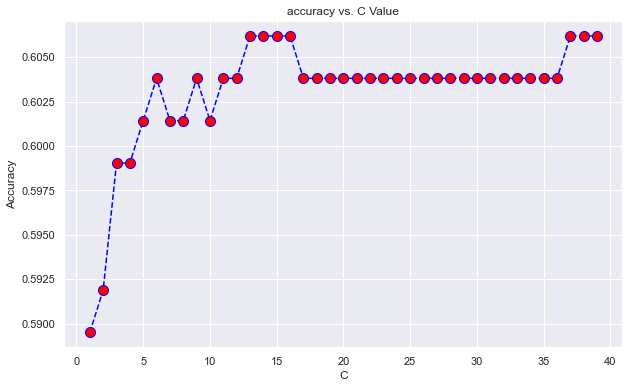

In [16]:
acc = []
for i in range(1,40):
    lr = LogisticRegression(solver='liblinear', C=i, random_state=0)
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. C Value')
plt.xlabel('C')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at C =",acc.index(max(acc)))

In [17]:
# C=3
lr = LogisticRegression(solver='liblinear', C=10, random_state=0)
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(preds_lr, y_test)
print(accuracy_lr)

0.6014319809069213


In [18]:
lr_cv_scores = cross_val_score(lr, X, y, scoring='accuracy', cv = kfolds)

print(lr_cv_scores.min())
print(lr_cv_scores.mean())
print(lr_cv_scores.max())

0.5023923444976076
0.5628958760537708
0.6172248803827751


In [19]:
arr_latency_lr = []

for i in range(0, iterations):
    start_time = time.time()
    preds_lr = lr.predict(X_test)
    end_time = time.time()
    latency_lr = (end_time - start_time) * 1000
    arr_latency_lr.append(latency_lr)
    
np.mean(arr_latency_lr)

0.1694202423095703

In [20]:
lr_cv_results = cross_validate(lr, X_train, y_train, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(lr_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(lr_cv_results['score_time'].mean() * 1000))

Test score:	0.5568648417450813
Scoring time:	0.5979299545288086


## 2.2 k-Nearest Neighbors (kNN)

Minimum error:- 0.38902147971360385 at K = 18


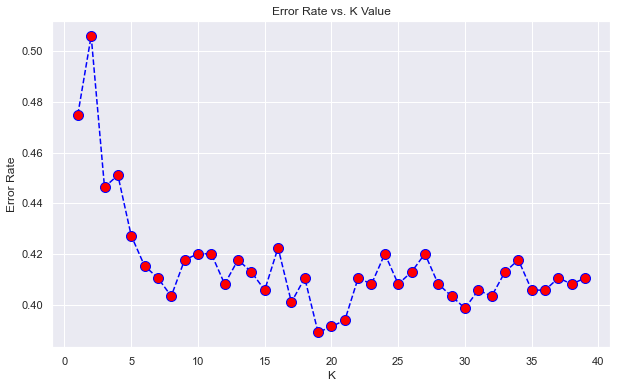

In [21]:
error_rate = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:  0.6109785202863962 at K = 18


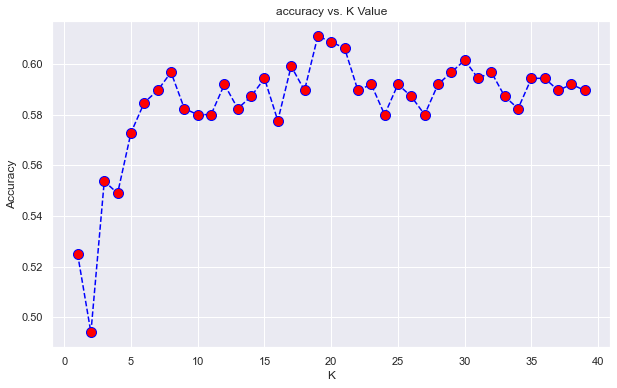

In [22]:
acc = []
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc)))

In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors=acc.index(max(acc)))
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(preds_knn, y_test)
print(accuracy_knn)

0.5894988066825776


In [24]:
knn_cv_scores = cross_val_score(knn, X, y, scoring='accuracy', cv = kfolds)

print(knn_cv_scores.min())
print(knn_cv_scores.mean())
print(knn_cv_scores.max())

0.48325358851674644
0.5346730462519936
0.5645933014354066


In [25]:
arr_latency_knn = []

for i in range(0, iterations):
    start_time = time.time()
    preds_knn = knn.predict(X_test)
    end_time = time.time()
    latency_knn = (end_time - start_time) * 1000
    arr_latency_knn.append(latency_knn)
    
np.mean(arr_latency_knn)

22.00926939646403

In [26]:
knn_cv_results = cross_validate(knn, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(knn_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(knn_cv_results['score_time'].mean() * 1000))

Test score:	0.5346730462519936
Scoring time:	12.736821174621582


## 2.3 LDA (Linear Discriminant Analysis)

In [27]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
preds_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(preds_lda, y_test)
print(accuracy_lda)

0.5799522673031027


In [28]:
lda_cv_scores = cross_val_score(lda, X, y, scoring='accuracy', cv = kfolds)

print(lda_cv_scores.min())
print(lda_cv_scores.mean())
print(lda_cv_scores.max())

0.48325358851674644
0.5518910913647754
0.5980861244019139


In [29]:
arr_latency_lda = []

for i in range(0, iterations):
    start_time = time.time()
    preds_lda = lda.predict(X_test)
    end_time = time.time()
    latency_lda = (end_time - start_time) * 1000
    arr_latency_lda.append(latency_lda)
    
np.mean(arr_latency_lda)

0.1573801040649414

In [30]:
lda_cv_results = cross_validate(lda, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(lda_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(lda_cv_results['score_time'].mean() * 1000))

Test score:	0.5518910913647754
Scoring time:	0.6991863250732422


## 2.4 QDA (Quadratic Discriminant Analysis)

In [31]:
qda = LinearDiscriminantAnalysis()
qda.fit(X_train, y_train)
preds_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(preds_qda, y_test)
print(accuracy_qda)

0.5799522673031027


In [32]:
qda_cv_scores = cross_val_score(qda, X, y, scoring='accuracy', cv = kfolds)

print(qda_cv_scores.min())
print(qda_cv_scores.mean())
print(qda_cv_scores.max())

0.48325358851674644
0.5518910913647754
0.5980861244019139


In [33]:
arr_latency_qda = []

for i in range(0, iterations):
    start_time = time.time()
    preds_qda = qda.predict(X_test)
    end_time = time.time()
    latency_qda = (end_time - start_time) * 1000
    arr_latency_qda.append(latency_qda)
    
np.mean(arr_latency_qda)

0.1609643300374349

In [34]:
qda_cv_results = cross_validate(qda, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(qda_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(qda_cv_results['score_time'].mean() * 1000))

Test score:	0.5518910913647754
Scoring time:	0.6659030914306641


## 2.5 Naive Bayes

In [35]:
nb = GaussianNB()
nb.fit(X_train, y_train)
preds_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(preds_nb, y_test)
print(accuracy_nb)

0.5560859188544153


In [36]:
nb_cv_scores = cross_val_score(nb, X, y, scoring='accuracy', cv = kfolds)

print(nb_cv_scores.min())
print(nb_cv_scores.mean())
print(nb_cv_scores.max())

0.47368421052631576
0.5165048986101618
0.5598086124401914


In [37]:
arr_latency_nb = []

for i in range(0, iterations):
    start_time = time.time()
    preds_nb = nb.predict(X_test)
    end_time = time.time()
    latency_nb = (end_time - start_time) * 1000
    arr_latency_nb.append(latency_nb)
    
np.mean(arr_latency_nb)

1.249837875366211

In [38]:
nb_cv_results = cross_validate(nb, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(nb_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(nb_cv_results['score_time'].mean() * 1000))

Test score:	0.5165048986101618
Scoring time:	1.2074708938598633


## 2.6 Tree-based Approaches

### Decision Tree Classifier

In [39]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

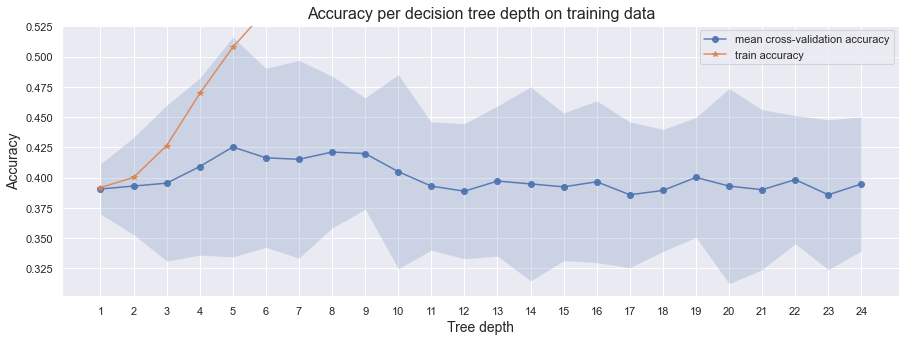

In [40]:
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [41]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-5 tree achieves the best mean cross-validation accuracy 42.52851 +/- 4.55242% on training dataset


In [42]:
dtc = DecisionTreeClassifier(max_depth=sm_best_tree_depth)
dtc.fit(X_train, y_train)
preds_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(preds_dtc, y_test)
print(accuracy_dtc)

0.4439140811455847


In [43]:
dtc_cv_scores = cross_val_score(dtc, X, y, scoring='accuracy', cv = kfolds)

print(dtc_cv_scores.min())
print(dtc_cv_scores.mean())
print(dtc_cv_scores.max())

0.37320574162679426
0.42755069491911596
0.47368421052631576


In [44]:
arr_latency_dtc = []

for i in range(0, iterations):
    start_time = time.time()
    preds_dtc = dtc.predict(X_test)
    end_time = time.time()
    latency_dtc = (end_time - start_time) * 1000
    arr_latency_dtc.append(latency_dtc)
    
np.mean(arr_latency_dtc)

0.1259326934814453

In [45]:
dtc_cv_results = cross_validate(dtc, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(dtc_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(dtc_cv_results['score_time'].mean() * 1000))

Test score:	0.4270722260195944
Scoring time:	0.6228446960449219


### Random Forest Classifier

In [46]:
def run_cross_validation_on_forest_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(bootstrap='False', max_depth=depth, n_estimators=200)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
def plot_cross_validation_on_forest_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

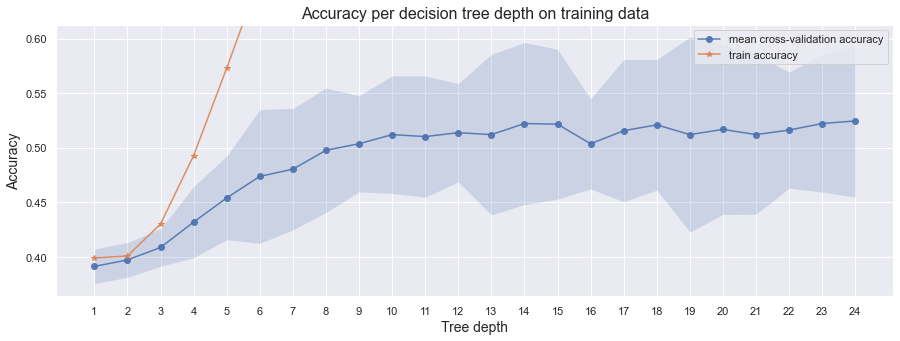

In [47]:
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_forest_trees(X_train, y_train, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                               'Accuracy per decision tree depth on training data')

In [48]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-24 tree achieves the best mean cross-validation accuracy 52.45509 +/- 3.50133% on training dataset


In [49]:
rfc = RandomForestClassifier(bootstrap='False', max_depth=sm_best_tree_depth, n_estimators=200)
rfc.fit(X_train, y_train)
preds_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(preds_rfc, y_test)
print(accuracy_rfc)

0.5871121718377088


In [50]:
rfc_cv_scores = cross_val_score(rfc, X, y, scoring='accuracy', cv = kfolds)

print(rfc_cv_scores.min())
print(rfc_cv_scores.mean())
print(rfc_cv_scores.max())

0.4880382775119617
0.5246229209387103
0.5885167464114832


In [51]:
arr_latency_rfc = []

for i in range(0, iterations):
    start_time = time.time()
    preds_rfc = rfc.predict(X_test)
    end_time = time.time()
    latency_rfc = (end_time - start_time) * 1000
    arr_latency_rfc.append(latency_rfc)
    
np.mean(arr_latency_rfc)

38.235155741373696

In [52]:
rfc_cv_results = cross_validate(rfc, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(rfc_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(rfc_cv_results['score_time'].mean() * 1000))

Test score:	0.5408863066757804
Scoring time:	29.046297073364258


## 2.7 Support Vector Machines (SVM)

### Linear kernel

In [53]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 25, 50]
}

cv_svm_linear_first = GridSearchCV(SVC(kernel='linear'), params, cv=10)
cv_svm_linear_first.fit(X_train, y_train)

print(cv_svm_linear_first.best_params_)
c = cv_svm_linear_first.best_params_['C']

{'C': 5}


In [54]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1]
}

cv_svm_linear_second = GridSearchCV(SVC(kernel='linear'), params, cv=10)
cv_svm_linear_second.fit(X_train, y_train)

print(cv_svm_linear_second.best_params_)
c = cv_svm_linear_second.best_params_['C']

{'C': 4.5}


In [55]:
svm_linear = SVC(C=c, kernel='linear')
svm_linear.fit(X_train, y_train)
preds_svm_linear = svm_linear.predict(X_test)
accuracy_svm_linear = accuracy_score(preds_svm_linear, y_test)
print(accuracy_svm_linear)

0.60381861575179


In [56]:
svm_linear_cv_scores = cross_val_score(svm_linear, X, y, scoring='accuracy', cv = kfolds)

print(svm_linear_cv_scores.min())
print(svm_linear_cv_scores.mean())
print(svm_linear_cv_scores.max())

0.5263157894736842
0.5724561403508772
0.5933014354066986


In [57]:
arr_latency_svm_linear = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_linear = svm_linear.predict(X_test)
    end_time = time.time()
    latency_svm_linear = (end_time - start_time) * 1000
    arr_latency_svm_linear.append(latency_svm_linear)
    
np.mean(arr_latency_svm_linear)

24.91449515024821

In [58]:
svm_linear_cv_results = cross_validate(svm_linear, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(svm_linear_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(svm_linear_cv_results['score_time'].mean() * 1000))

Test score:	0.5724561403508772
Scoring time:	12.755179405212402


### Radial Kernel

In [59]:
params = {
    'C': [0.1, 1, 3, 5, 10, 20, 30],
    'gamma': [00.1, 0.1, 1, 5]
}

cv_svm_radial_first = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
cv_svm_radial_first.fit(X_train, y_train)
c = cv_svm_radial_first.best_params_['C']
gamma = cv_svm_radial_first.best_params_['gamma']
print(cv_svm_radial_first.best_params_)

{'C': 30, 'gamma': 0.1}


In [60]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1],
    'gamma': [gamma - 1, gamma - 0.5, gamma, gamma + 0.5, gamma + 1]
}

cv_svm_radial_second = GridSearchCV(SVC(kernel='rbf'), params, cv=10)
cv_svm_radial_second.fit(X_train, y_train)
c = cv_svm_radial_second.best_params_['C']
gamma = cv_svm_radial_second.best_params_['gamma']
print(cv_svm_radial_first.best_params_)

{'C': 30, 'gamma': 0.1}


In [61]:
svm_radial = SVC(C=c, kernel='rbf',gamma=gamma)
svm_radial.fit(X_train, y_train)
preds_svm_radial = svm_radial.predict(X_test)
accuracy_svm_radial = accuracy_score(preds_svm_radial, y_test)
print(accuracy_svm_radial)

0.6133651551312649


In [62]:
svm_radial_cv_scores = cross_val_score(svm_radial, X, y, scoring='accuracy', cv = kfolds)

print(svm_radial_cv_scores.min())
print(svm_radial_cv_scores.mean())
print(svm_radial_cv_scores.max())

0.5311004784688995
0.5939690134426976
0.6363636363636364


In [63]:
arr_latency_svm_radial = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_radial = svm_radial.predict(X_test)
    end_time = time.time()
    latency_svm_radial = (end_time - start_time) * 1000
    arr_latency_svm_radial.append(latency_svm_radial)
    
np.mean(arr_latency_svm_radial)

64.02600606282552

In [64]:
svm_radial_cv_results = cross_validate(svm_radial, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(svm_radial_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(svm_radial_cv_results['score_time'].mean() * 1000))

Test score:	0.5939690134426976
Scoring time:	35.02457141876221


### Polynomial Kernel

In [65]:
params = {
    'C': [0.1, 1, 5, 10],
    'gamma': [0.01, 0.1, 1, 5],
    'degree':[2, 3, 4]
}

cv_svm_polynomial_first = GridSearchCV(SVC(kernel='poly'), params, cv=10)
cv_svm_polynomial_first.fit(X_train, y_train)
c = cv_svm_polynomial_first.best_params_['C']
gamma = cv_svm_polynomial_first.best_params_['gamma']
degree = cv_svm_polynomial_first.best_params_['degree']
print(cv_svm_polynomial_first.best_params_)

{'C': 1, 'degree': 3, 'gamma': 1}


In [66]:
# Testing a more narrow range

params = {
    'C': [c - 1, c - 0.5, c, c + 0.5, c + 1],
    'gamma': [gamma - 1, gamma - 0.5, gamma, gamma + 0.5, gamma + 1],
    'degree': [degree - 1, degree - 0.5, degree, degree + 0.5, degree + 1]
}

cv_svm_polynomial_second = GridSearchCV(SVC(kernel='poly'), params, cv=10)
cv_svm_polynomial_second.fit(X_train, y_train)
c = cv_svm_polynomial_second.best_params_['C']
gamma = cv_svm_polynomial_second.best_params_['gamma']
degree = cv_svm_polynomial_second.best_params_['degree']
print(cv_svm_polynomial_second.best_params_)

{'C': 0.5, 'degree': 3, 'gamma': 1}


In [67]:
svm_polynomial = SVC(C=c, kernel='poly', degree=degree, gamma = gamma)
svm_polynomial.fit(X_train, y_train)
preds_svm_polynomial = svm_polynomial.predict(X_test)
accuracy_svm_polynomial = accuracy_score(preds_svm_polynomial, y_test)
print(accuracy_svm_polynomial)

0.5871121718377088


In [68]:
svm_polynomial_cv_scores = cross_val_score(svm_polynomial, X, y, scoring='accuracy', cv = kfolds)

print(svm_polynomial_cv_scores.min())
print(svm_polynomial_cv_scores.mean())
print(svm_polynomial_cv_scores.max())

0.5167464114832536
0.5700546821599454
0.6124401913875598


In [69]:
arr_latency_svm_polynomial = []

for i in range(0, iterations):
    start_time = time.time()
    preds_svm_polynomial = svm_polynomial.predict(X_test)
    end_time = time.time()
    latency_svm_polynomial = (end_time - start_time) * 1000
    arr_latency_svm_polynomial.append(latency_svm_polynomial)
    
np.mean(arr_latency_svm_polynomial)

27.37449010213216

In [70]:
svm_polynomial_cv_results = cross_validate(svm_polynomial, X, y, scoring='accuracy', cv = kfolds)

print('Test score:\t' + str(svm_polynomial_cv_results['test_score'].mean()))
print('Scoring time:\t' + str(svm_polynomial_cv_results['score_time'].mean() * 1000))

Test score:	0.5700546821599454
Scoring time:	16.173911094665527


# Assessing Model Performances

## Model Accuracies

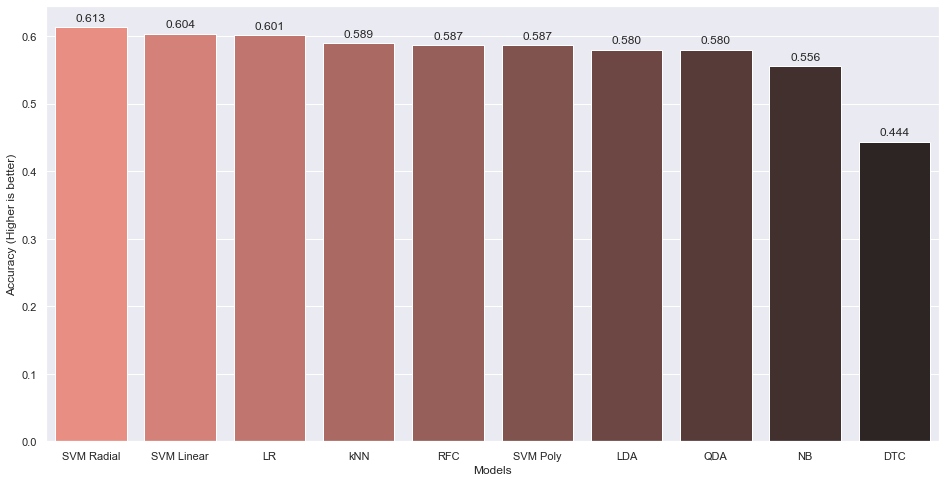

In [71]:
results = pd.DataFrame({
    "Accuracy":[
        accuracy_lr,
        accuracy_knn,
        accuracy_lda,
        accuracy_qda,
        accuracy_nb,
        accuracy_dtc,
        accuracy_rfc,
        accuracy_svm_linear,
        accuracy_svm_radial,
        accuracy_svm_polynomial
        
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (Higher is better)")

plt.show()

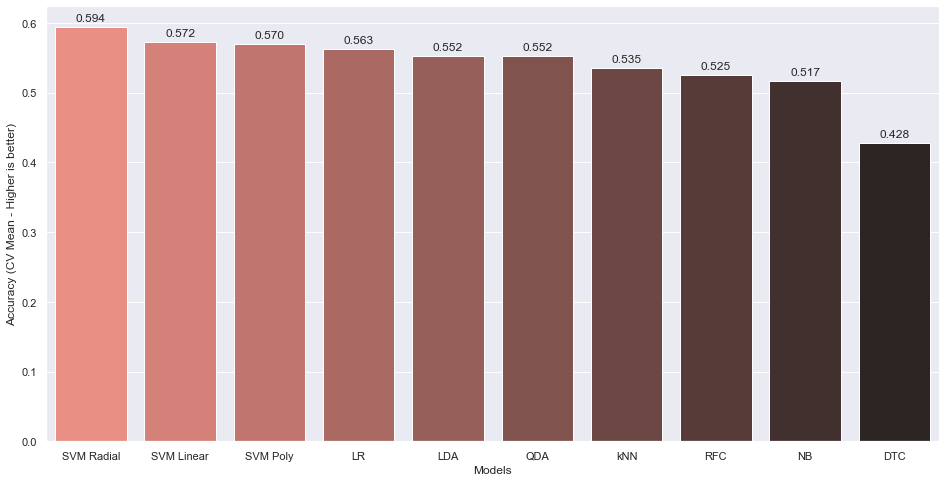

In [72]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.mean(),
        knn_cv_scores.mean(),
        lda_cv_scores.mean(),
        qda_cv_scores.mean(),
        nb_cv_scores.mean(),
        dtc_cv_scores.mean(),
        rfc_cv_scores.mean(),
        svm_linear_cv_scores.mean(),
        svm_radial_cv_scores.mean(),
        svm_polynomial_cv_scores.mean()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Mean - Higher is better)")

plt.show()

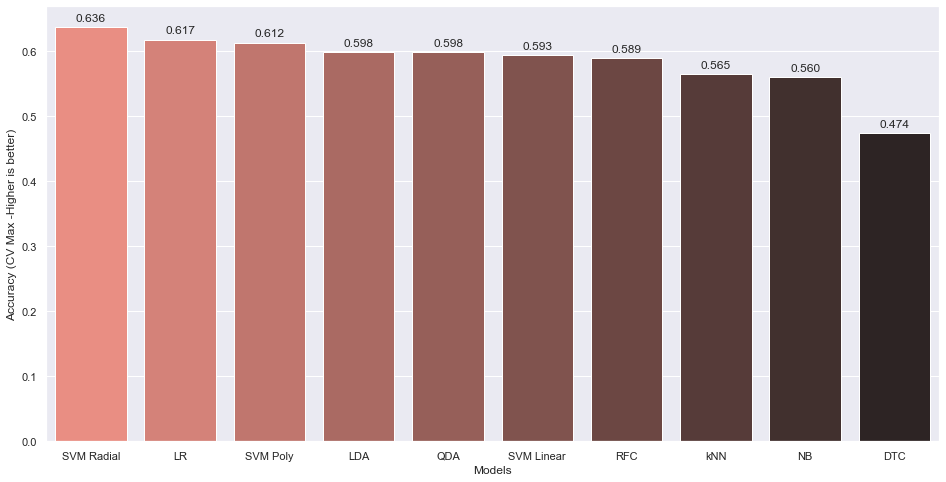

In [73]:
results = pd.DataFrame({
    "Accuracy":[
        lr_cv_scores.max(),
        knn_cv_scores.max(),
        lda_cv_scores.max(),
        qda_cv_scores.max(),
        nb_cv_scores.max(),
        dtc_cv_scores.max(),
        rfc_cv_scores.max(),
        svm_linear_cv_scores.max(),
        svm_radial_cv_scores.max(),
        svm_polynomial_cv_scores.max()
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Accuracy", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Accuracy",ax=ax, palette="dark:salmon_r")

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Accuracy (CV Max -Higher is better)")

plt.show()

## Model Response Time

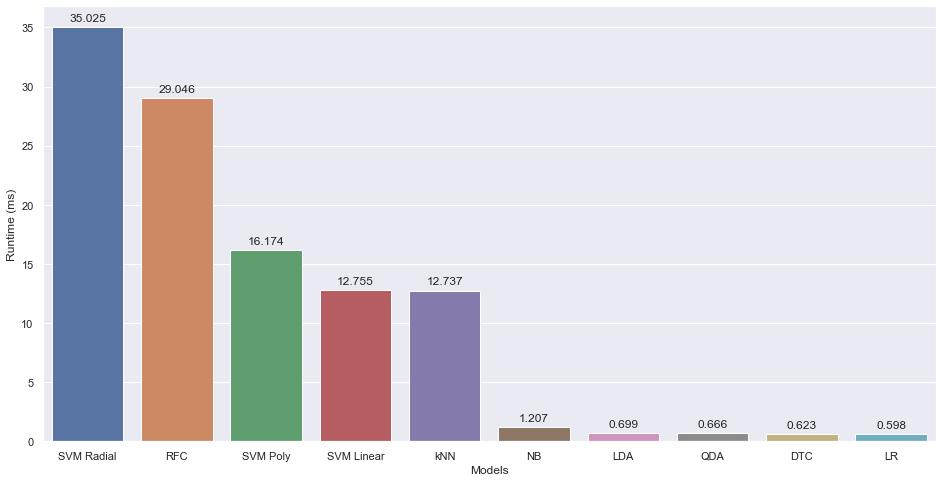

In [74]:
results = pd.DataFrame({
    "Runtime":[
        lr_cv_results['score_time'].mean() * 1000,
        knn_cv_results['score_time'].mean() * 1000,
        lda_cv_results['score_time'].mean() * 1000,
        qda_cv_results['score_time'].mean() * 1000,
        nb_cv_results['score_time'].mean() * 1000,
        dtc_cv_results['score_time'].mean() * 1000,
        rfc_cv_results['score_time'].mean() * 1000,
        svm_linear_cv_results['score_time'].mean() * 1000,
        svm_radial_cv_results['score_time'].mean() * 1000,
        svm_polynomial_cv_results['score_time'].mean() * 1000
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Runtime", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Runtime",ax=ax)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Runtime (ms)")

plt.show()

## Model Response Time (remove outlier)

In [75]:
def removeOutliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()

In [76]:
arr_latency_lr_n = removeOutliers(arr_latency_lr)
arr_latency_knn_n = removeOutliers(arr_latency_knn)
arr_latency_lda_n = removeOutliers(arr_latency_lda)
arr_latency_qda_n = removeOutliers(arr_latency_qda)
arr_latency_nb_n = removeOutliers(arr_latency_nb)
arr_latency_dtc_n = removeOutliers(arr_latency_dtc)
arr_latency_rfc_n = removeOutliers(arr_latency_rfc)
arr_latency_svm_linear_n = removeOutliers(arr_latency_svm_linear)
arr_latency_svm_radial_n = removeOutliers(arr_latency_svm_radial)
arr_latency_svm_polynomial_n = removeOutliers(arr_latency_svm_polynomial)

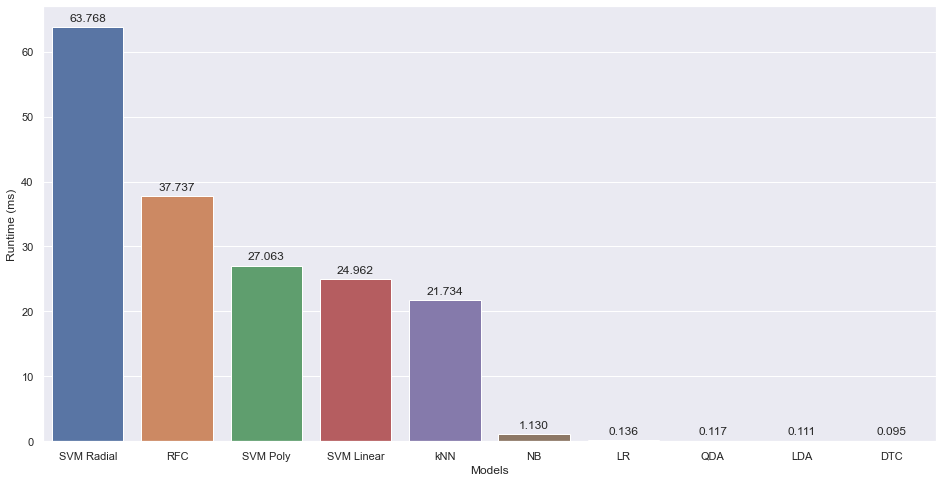

In [77]:
results = pd.DataFrame({
    "Runtime":[
        np.mean(arr_latency_lr_n),
        np.mean(arr_latency_knn_n),
        np.mean(arr_latency_lda_n),
        np.mean(arr_latency_qda_n),
        np.mean(arr_latency_nb_n),
        np.mean(arr_latency_dtc_n),
        np.mean(arr_latency_rfc_n),
        np.mean(arr_latency_svm_linear_n),
        np.mean(arr_latency_svm_radial_n),
        np.mean(arr_latency_svm_polynomial_n)
    ],
    "Models":[
        "LR",
        "kNN",
        "LDA",
        "QDA",
        "NB",
        "DTC",
        "RFC",
        "SVM Linear",
        "SVM Radial",
        "SVM Poly"
    ]
})

results = results.sort_values("Runtime", ascending=False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,8))

cplot = sns.barplot(data=results, x="Models", y="Runtime",ax=ax)

for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Add labels to plot
plt.xlabel("Models")
plt.ylabel("Runtime (ms)")

plt.show()